In [92]:
import pandas as pd
import scipy.stats as ss
import numpy as np
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/car/Chile.csv") 

In [44]:
data.head() #diplay first 5 entries 
# data.head(10) #diplay first 10 entries 

,Unnamed: 0,region,population,sex,age,education,income,statusquo,vote
0,1,N,175000,M,65.0,P,35000.0,1.00820,Y
1,2,N,175000,M,29.0,PS,7500.0,-1.29617,N
2,3,N,175000,F,38.0,P,15000.0,1.23072,Y
3,4,N,175000,F,49.0,P,35000.0,-1.03163,N
4,5,N,175000,F,23.0,S,35000.0,-1.10496,N


In [45]:
data.tail() #diplay last 5 entries 
# data.tail(10) #diplay last 10 entries 

,Unnamed: 0,region,population,sex,age,education,income,statusquo,vote
2695,2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2696,2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2697,2698,M,15000,F,44.0,P,75000.0,1.42045,Y
2698,2699,M,15000,M,21.0,S,75000.0,0.18315,NaN
2699,2700,M,15000,M,20.0,PS,35000.0,1.38179,Y


In [46]:
data.describe() #Provide summary statistics for numeric data only

,Unnamed: 0,population,age,income,statusquo
count,2700.000000,2700.000000,2699.000000,2602.000000,2.683000e+03
mean,1350.500000,152222.222222,38.548722,33875.864719,-1.118151e-08
std,779.567188,102198.039602,14.756415,39502.867120,1.000186e+00
min,1.000000,3750.000000,18.000000,2500.000000,-1.803010e+00
25%,675.750000,25000.000000,26.000000,7500.000000,-1.002235e+00
50%,1350.500000,175000.000000,36.000000,15000.000000,-4.558000e-02
75%,2025.250000,250000.000000,49.000000,35000.000000,9.685750e-01
max,2700.000000,250000.000000,70.000000,200000.000000,2.048590e+00


In [47]:
data.describe(include= 'all')

,Unnamed: 0,region,population,sex,age,education,income,statusquo,vote
count,2700.000000,2700,2700.000000,2700,2699.000000,2689,2602.000000,2.683000e+03,2532
unique,NaN,5,NaN,2,NaN,3,NaN,NaN,4
top,NaN,SA,NaN,F,NaN,S,NaN,NaN,N
freq,NaN,960,NaN,1379,NaN,1120,NaN,NaN,889
mean,1350.500000,NaN,152222.222222,NaN,38.548722,NaN,33875.864719,-1.118151e-08,NaN
std,779.567188,NaN,102198.039602,NaN,14.756415,NaN,39502.867120,1.000186e+00,NaN
min,1.000000,NaN,3750.000000,NaN,18.000000,NaN,2500.000000,-1.803010e+00,NaN
25%,675.750000,NaN,25000.000000,NaN,26.000000,NaN,7500.000000,-1.002235e+00,NaN
50%,1350.500000,NaN,175000.000000,NaN,36.000000,NaN,15000.000000,-4.558000e-02,NaN
75%,2025.250000,NaN,250000.000000,NaN,49.000000,NaN,35000.000000,9.685750e-01,NaN


In [52]:
#data.income.cumsum() # CDF


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 9 columns):
Unnamed: 0    2700 non-null int64
region        2700 non-null object
population    2700 non-null int64
sex           2700 non-null object
age           2699 non-null float64
education     2689 non-null object
income        2602 non-null float64
statusquo     2683 non-null float64
vote          2532 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 189.9+ KB


In [54]:
data.income.skew() 

2.5875316006676097

In [55]:
data.income.kurt() # 0 means Normal/Mesokurtic

7.316215495370039

In [56]:
data.income.median() #Q2=D5=P50

15000.0

In [57]:
data.income.mean()

33875.86471944658

In [59]:
dt1=data[['income']].dropna()
ss.gmean(dt1)

array([20558.53158882])

In [60]:
ss.hmean(dt1)

array([12565.18063856])

In [61]:
data.isnull().sum() #to find count of null values in each column

Unnamed: 0      0
region          0
population      0
sex             0
age             1
education      11
income         98
statusquo      17
vote          168
dtype: int64

In [62]:
data.count()

Unnamed: 0    2700
region        2700
population    2700
sex           2700
age           2699
education     2689
income        2602
statusquo     2683
vote          2532
dtype: int64

In [63]:
data["region"].value_counts() #will display the factors and count for given attribute

SA    960
S     718
C     600
N     322
M     100
Name: region, dtype: int64

In [65]:
data["sex"].value_counts() #count of numeric value (we can find mode)

F    1379
M    1321
Name: sex, dtype: int64

In [66]:
data.groupby(['education']).count() # one way classification according to common edu (count)

,Unnamed: 0,region,population,sex,age,income,statusquo,vote
education,,,,,,,,
P,1107,1107,1107,1107,1106,1072,1099,1036
PS,462,462,462,462,462,445,458,438
S,1120,1120,1120,1120,1120,1076,1116,1048


In [67]:
data.groupby(['education']).mean() # one way classification according to common edu (mean)

,Unnamed: 0,population,age,income,statusquo
education,,,,,
P,1281.822042,127008.807588,44.740506,17716.884328,0.160419
PS,1423.584416,182640.692641,33.924242,68325.842697,-0.182269
S,1387.087500,164064.732143,34.178571,35868.959108,-0.083543


In [68]:
data.groupby(['sex']).count()

,Unnamed: 0,region,population,age,education,income,statusquo,vote
sex,,,,,,,,
F,1379,1379,1379,1379,1372,1329,1368,1309
M,1321,1321,1321,1320,1317,1273,1315,1223


In [69]:
data.groupby(['region']).count()

,Unnamed: 0,population,sex,age,education,income,statusquo,vote
region,,,,,,,,
C,600,600,600,600,598,579,597,569
M,100,100,100,100,100,93,100,81
N,322,322,322,322,321,314,322,313
S,718,718,718,718,717,697,709,679
SA,960,960,960,959,953,919,955,890


In [70]:
data.groupby(['sex']).mean()

,Unnamed: 0,population,age,income,statusquo
sex,,,,,
F,1358.466280,155515.772299,38.310370,32041.008277,0.065706
M,1342.183952,148784.065102,38.797727,35791.437549,-0.068355


In [71]:
data.groupby(['sex'])['income'].mean()

sex
F    32041.008277
M    35791.437549
Name: income, dtype: float64

In [72]:
data.groupby(['education', 'vote']).count() # multi-way classification (count)
#data.groupby(['education', 'vote']).mean() # multi-way classification (mean)

Unnamed: 0  region  population  sex  age  income  statusquo
education vote                                                             
P         A             52      52          52   52   52      49         52
          N            266     266         266  266  266     262        265
          U            296     296         296  296  295     286        292
          Y            422     422         422  422  422     410        420
PS        A             32      32          32   32   32      31         31
          N            224     224         224  224  224     220        224
          U             52      52          52   52   52      48         50
          Y            130     130         130  130  130     123        130
S         A            103     103         103  103  103      99        102
          N            397     397         397  397  397     385        397
          U            237     237         237  237  237     223        235
          Y            311     311         311  311  311     304        311

In [73]:
df=data[['sex', 'income']]
df.groupby(['sex']).count()

,income
sex,
F,1329
M,1273


In [74]:
data.corr(method ='pearson')

,Unnamed: 0,population,age,income,statusquo
Unnamed: 0,1.000000,0.402067,0.013896,0.143108,-0.052971
population,0.402067,1.000000,0.020983,0.220417,-0.198497
age,0.013896,0.020983,1.000000,-0.032363,0.115069
income,0.143108,0.220417,-0.032363,1.000000,0.038751
statusquo,-0.052971,-0.198497,0.115069,0.038751,1.000000


In [75]:
data.corr(method ='spearman')

,Unnamed: 0,population,age,income,statusquo
Unnamed: 0,1.000000,0.412246,0.018057,0.110332,-0.053032
population,0.412246,1.000000,0.023555,0.239498,-0.206569
age,0.018057,0.023555,1.000000,-0.060510,0.106118
income,0.110332,0.239498,-0.060510,1.000000,0.019836
statusquo,-0.053032,-0.206569,0.106118,0.019836,1.000000


In [76]:
data.shape

(2700, 9)

In [77]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4003FCF98>]],
      dtype=object)

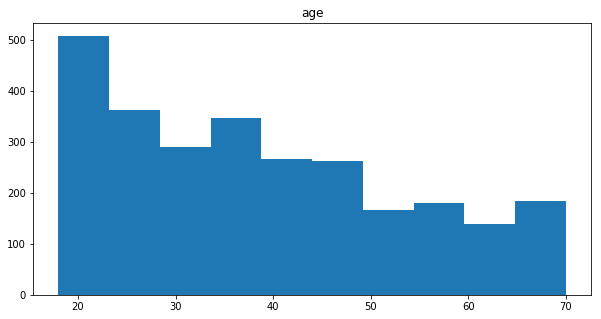

In [78]:
data.hist('age', grid=False, figsize=(10,5), bins=10)

In [79]:
import matplotlib.pyplot as plt

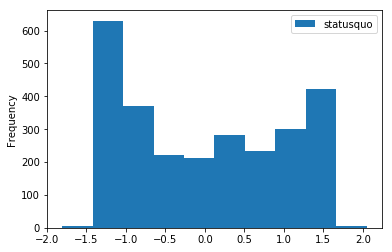

In [98]:
data.plot(kind='hist', x='age', y='statusquo')

In [99]:
ts=pd.read_csv('AP.csv')

In [100]:
ts.head(5)

,Month,pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


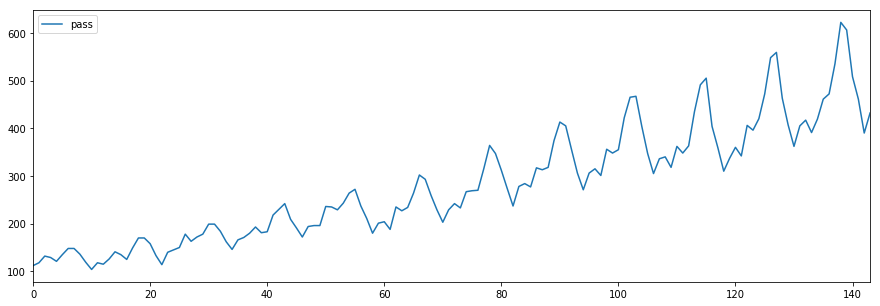

In [101]:
ts.plot(figsize=(15,5)) #or ts.plot(kind='line', x='Month', y='pass', figsize=(15,5))

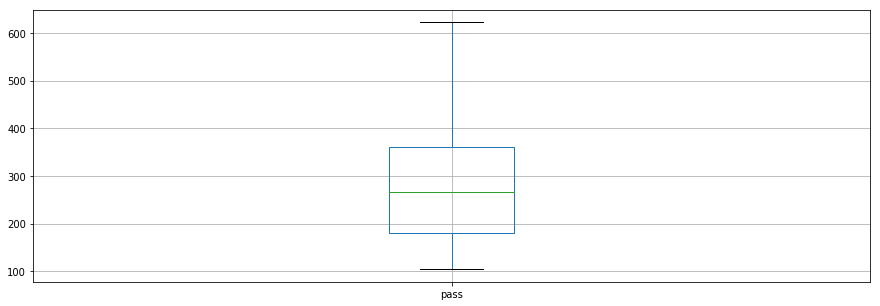

In [102]:
ts.boxplot(column='pass', figsize=(15,5))

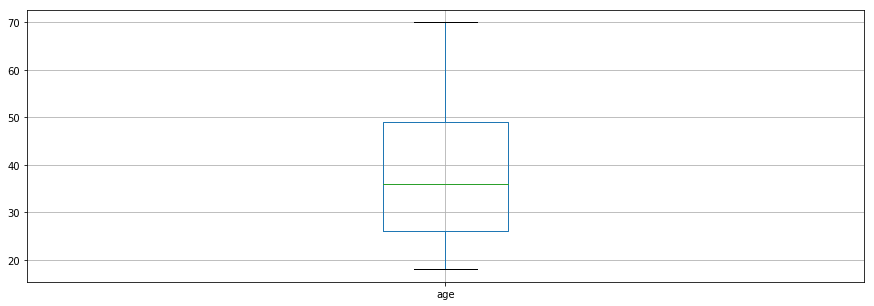

In [103]:
data.boxplot(column='age', figsize=(15,5))

C:\Users\umesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


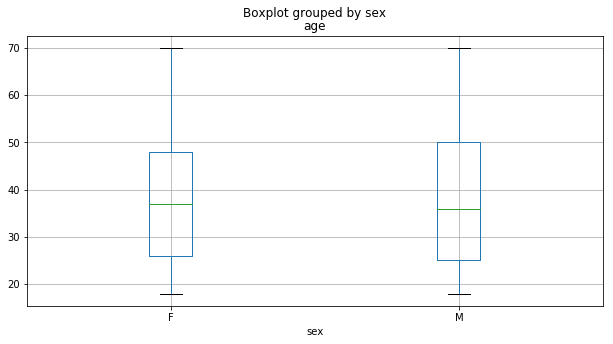

In [104]:
data.boxplot(column='age', by='sex', figsize=(10,5))

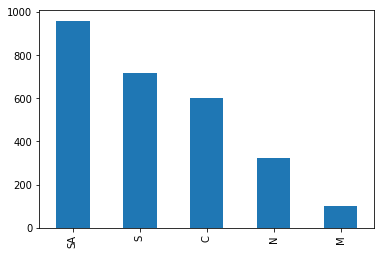

In [105]:
data['region'].value_counts().plot(kind='bar');

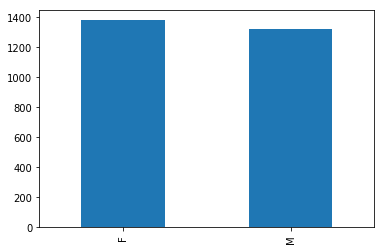

In [106]:
data['sex'].value_counts().plot(kind='bar');

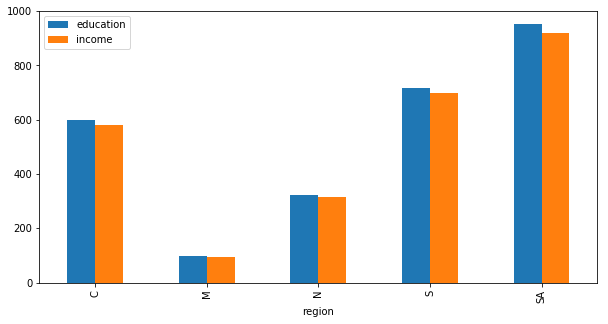

In [107]:
Y=data.groupby(['region']).count()
Y=Y[['education','income']]
Y.plot(kind='bar' , figsize=(10,5))
plt.show()

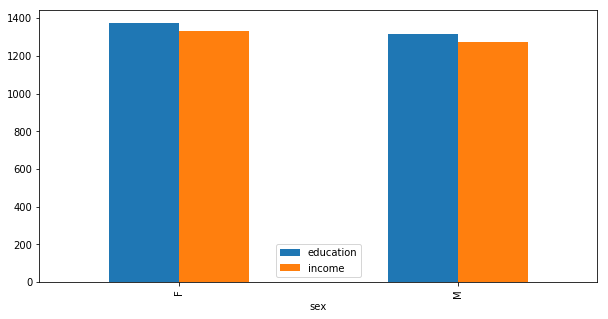

In [108]:
Y=data.groupby(['sex']).count()
Y=Y[['education','income']]
Y.plot(kind='bar' , figsize=(10,5))
plt.show()

In [109]:
import pandas as pd

In [110]:
df2=data[['region','income']] #seprated data 

In [111]:
df3=df2.dropna() # removed missing observations

In [112]:
df3.isnull().sum() # to check is there any missing value

region    0
income    0
dtype: int64

In [113]:
df3sum = df3.groupby(df3["region"])["income"].sum()
df3sum

region
C     18135000.0
M      2465000.0
N      9660000.0
S     18880000.0
SA    39005000.0
Name: income, dtype: float64

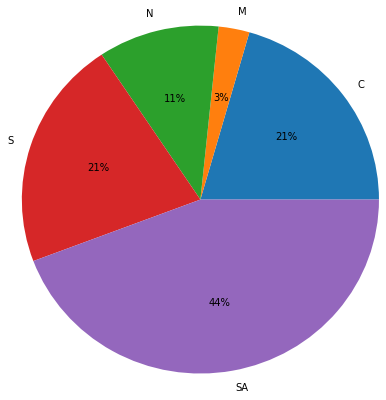

In [114]:
from pylab import rcParams # to fix plot size
rcParams['figure.figsize'] = 4, 4 # to fix plot size
plt.pie(df3sum, labels=df3sum.index, autopct='%.0f%%', radius=2);

plt.show()

#### Shapiro wilk Test

In [115]:
import scipy.stats as ss
data1=ss.norm.rvs(size=1000,scale=5, loc=150)
stat, p=ss.shapiro(data1)
p

0.5809053182601929

###### H0: Given Data follows Normal Distribution
###### H1: Given Data does not follow Normal Distribution

###### p value is greater than 0.05 Hence H0 accepted

# Scatter Plot:

In [116]:
salary=pd.read_csv('https://data.sfgov.org/api/views/88g8-5mnd/rows.csv')

KeyboardInterrupt: 

In [ ]:
salary.head()

In [ ]:
salary.describe(include='all')

In [ ]:
snew=salary[salary.Salaries<=5000]

In [ ]:
snew.describe(include='all')

In [ ]:
sold=salary[salary.Salaries>5000]

In [ ]:
sold.describe(include='all')

In [50]:
sold.sort_values(by='Salaries')

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
415254,Calendar,2013,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,8588,5000.09,0.00,0.00,5000.09,6171.82,0.00,-0.01,6171.81,11171.90
142676,Calendar,2017,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,46987,5000.21,0.00,0.00,5000.21,0.00,1937.34,388.09,2325.43,7325.64
260780,Calendar,2017,4,Community Health,DPH,DPH Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,...,33381,5000.44,0.00,52.12,5052.56,921.12,1173.55,489.59,2584.26,7636.82
48181,Fiscal,2016,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1600,"Payroll, Billing & Accounting",...,33950,5000.80,0.00,0.00,5000.80,930.65,947.68,405.68,2284.01,7284.81
409451,Fiscal,2017,5,Culture & Recreation,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,25388,5000.94,0.00,11.46,5012.40,0.00,1727.30,389.04,2116.34,7128.74
60386,Calendar,2013,4,Community Health,DPH,DPH Public Health,858,"Teamsters - Supervising Nurses, Local 856",2300,Nursing,...,43501,5001.27,0.00,1209.87,6211.14,1651.84,0.00,3273.48,4925.32,11136.46
247202,Fiscal,2015,2,"Public Works, Transportation & Commerce",PUC,PUB Public Utilities Bureaus,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,13965,5001.60,0.00,0.00,5001.60,1290.41,1149.47,385.74,2825.62,7827.22
378899,Calendar,2017,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,46566,5001.72,0.00,168.13,5169.85,0.00,401.99,401.28,803.27,5973.12
358303,Calendar,2013,6,General Administration & Finance,REG,REG Elections,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,8765,5001.79,595.09,0.00,5596.88,0.00,1489.19,433.31,1922.50,7519.38
257480,Calendar,2016,4,Community Health,DPH,DPH Public Health,250,"SEIU - Health Workers, Local 1021",2300,Nursing,...,16845,5002.13,0.00,257.53,5259.66,938.61,888.28,477.42,2304.31,7563.97


In [51]:
import matplotlib.pyplot as plt

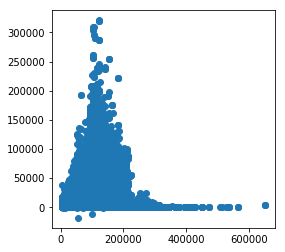

In [55]:
plt.scatter(x=sold.Salaries,y=sold.Overtime)
plt.show()

In [62]:
ss.hmean([2,3,4])

2.7692307692307696

In [64]:
ss.gmean([2,8])

4.0

In [119]:
ss.mode([2,3,2,3,4,2])

ModeResult(mode=array([2]), count=array([3]))

In [120]:
# Example: If frequency distribution is available
import numpy as np
x =[13,14,15,16,17]
f =[2,5,13,7,3]
p=sum(np.divide(f,x))
q=sum(f)
np.divide(q,p)

15.063067059210143